In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance_df=pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/insurance.csv',sep=',') 

In [3]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


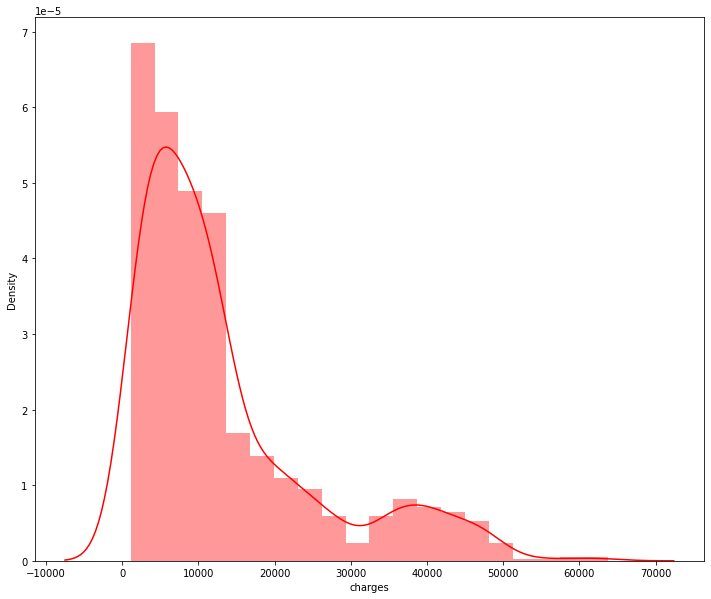

In [5]:
plt.figure(figsize=(12,10))
sns.distplot(insurance_df['charges'], bins = 20, color = 'red')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
# {female : 0, male : 1 }
le.fit(insurance_df['sex'].drop_duplicates())
# make transformations
insurance_df ['sex'] = le.fit_transform(insurance_df['sex'])

In [8]:
le.fit(insurance_df['smoker'].drop_duplicates())
# make transformations into label encoding
insurance_df ['smoker'] = le.fit_transform(insurance_df['smoker'])

In [9]:
le.fit(insurance_df['region'].drop_duplicates())
# make transformations
insurance_df ['region'] = le.fit_transform(insurance_df['region'])

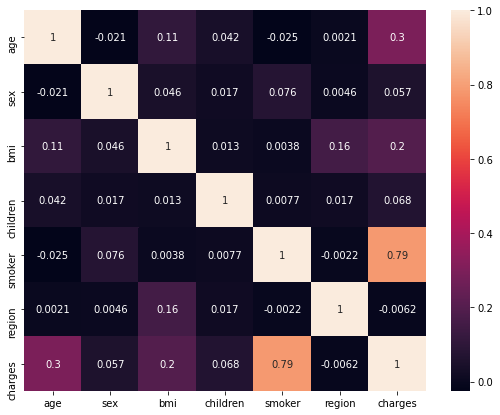

In [10]:
plt.figure(figsize=(9,7))
sns.heatmap(insurance_df.corr(), annot=True)

In [11]:
insurance_df.drop(['region'], axis =1 , inplace=True)

In [12]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


feature selection(target:charges)

In [13]:
Y=insurance_df['charges']

In [14]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [15]:
x=insurance_df.drop(['charges'],axis=1)

In [16]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


**Data preprocessing**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
scaled_data = scaler.fit_transform(x)

In [21]:
scaled_data

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ],
       ...,
       [0.        , 0.        , 0.56201238, 0.        , 0.        ],
       [0.06521739, 0.        , 0.26472962, 0.        , 0.        ],
       [0.93478261, 0.        , 0.35270379, 0.        , 1.        ]])

**Cross Validation**

In [22]:
from sklearn.model_selection import train_test_split
#  test_size here is 0.2 (i.e: 20%) => 80% for training
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, Y, test_size = 0.2, random_state = 0) 

**Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [24]:
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lin_reg.score(X_test, Y_test)

0.7978644236809905

In [26]:
lin_reg.intercept_

-2193.697852358202

In [27]:
lin_reg.coef_

array([ 1.17278049e+04, -2.34557931e+01,  1.19201713e+04,  2.15404694e+03,
        2.35890247e+04])

**Performance of model**

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
predictions = lin_reg.predict(X_test)

In [30]:
mean_squared_error(Y_test, predictions)

32165826.643605124

In [31]:
r2_score(Y_test, predictions)

0.7978644236809905